In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Pokemon.csv")

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
df.rename(columns={
    "Type 1" : "Type1",
    "Type 2" : "Type2",
    "Sp. Atk" : "SpAtk",
    "Sp. Def" : "SpDef",
}, inplace=True)

df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [6]:
na_counts = df.isna().sum()

na_counts

#               0
Name            0
Type1           0
Type2         386
Total           0
HP              0
Attack          0
Defense         0
SpAtk           0
SpDef           0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
df["Type2"].fillna("None", inplace=True)

df["Type2"]

/tmp/ipykernel_8792/1702122675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type2"].fillna("None", inplace=True)


0      Poison
1      Poison
2      Poison
3      Poison
4        None
        ...  
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type2, Length: 800, dtype: object

In [8]:
df.groupby(["Generation"])["#"].count()

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: #, dtype: int64

In [9]:
df["Generation"].value_counts().sort_index()

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: count, dtype: int64

In [10]:
df["Type1"].value_counts()

Type1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [11]:
df.groupby("Type1")[
    ["Total", "HP", "Attack", "Defense", "SpAtk", "SpDef", "Speed"]
].mean().round(1).sort_values("Total", ascending=False)

,Total,HP,Attack,Defense,SpAtk,SpDef,Speed
Type1,,,,,,,
Dragon,550.5,83.3,112.1,86.4,96.8,88.8,83.0
Steel,487.7,65.2,92.7,126.4,67.5,80.6,55.3
Flying,485.0,70.8,78.8,66.2,94.2,72.5,102.5
Psychic,475.9,70.6,71.5,67.7,98.4,86.3,81.5
Fire,458.1,69.9,84.8,67.8,89.0,72.2,74.4
Rock,453.8,65.4,92.9,100.8,63.3,75.5,55.9
Dark,445.7,66.8,88.4,70.2,74.6,69.5,76.2
Electric,443.4,59.8,69.1,66.3,90.0,73.7,84.5
Ghost,439.6,64.4,73.8,81.2,79.3,76.5,64.3


In [12]:
df.groupby("Legendary")[
    ["Total", "HP", "Attack", "Defense", "SpAtk", "SpDef", "Speed"]
].mean().round(1)

,Total,HP,Attack,Defense,SpAtk,SpDef,Speed
Legendary,,,,,,,
False,417.2,67.2,75.7,71.6,68.5,68.9,65.5
True,637.4,92.7,116.7,99.7,122.2,105.9,100.2


<Axes: xlabel='Attack', ylabel='Count'>

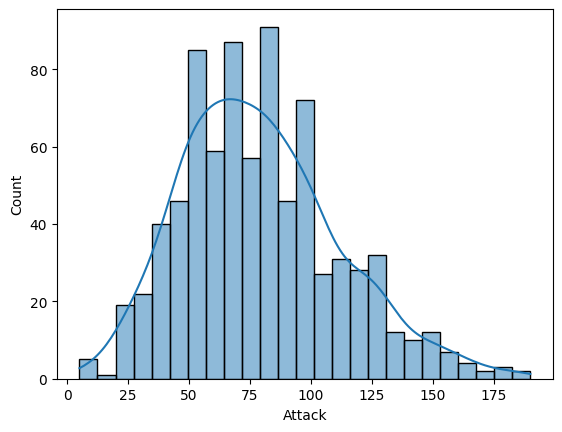

In [13]:
sns.histplot(data=df, x="Attack", bins=25, kde=True)

<Axes: xlabel='Speed', ylabel='Count'>

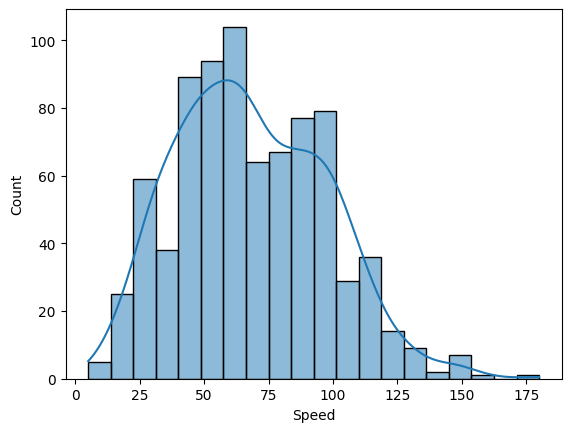

In [14]:
sns.histplot(data=df, x="Speed", bins=20, kde=True)

In [15]:
top_types = df["Type1"].value_counts().head(10).index

top_types

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock',
       'Electric', 'Ground', 'Ghost'],
      dtype='object', name='Type1')

In [16]:
df[df["Type1"].isin(top_types)]

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<Axes: xlabel='Type1', ylabel='Defense'>

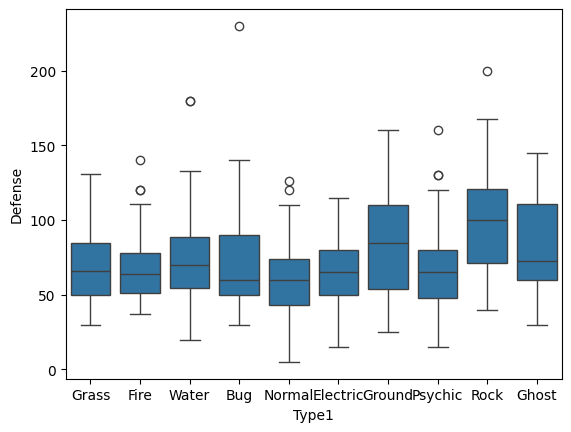

In [17]:
defdata = df[df["Type1"].isin(top_types) ]

sns.boxplot(data=defdata, x="Type1", y="Defense")